## Write Custom Function to Compute Histogram for a Numerical Array

- You can use numpy

- Your function takes two arguments: 1- list 2- interval

- Your function would return a dictionary with intervals as keys and how many of elements in list are in the intervals as values



In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_copy.csv')
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# histogram function

def custom_hist(ls, interval):
    hist_ls_dict = dict()
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    I = np.ceil((max_ls - min_ls) / interval)
    ls = sorted(ls)
    print(min_ls, max_ls)
#     print(I)
#     print(ls)

    lower = min_ls
    upper = lower + I
    
    for j in range(interval):
                
        start = np.searchsorted(ls, lower, 'left') 
        end = np.searchsorted(ls, upper, 'right') 
        result = np.arange(start, end) 
        
        hist_ls_dict[j] = len(result)
        
        lower += I
        upper += I


    return hist_ls_dict
        
print(custom_hist(df['Age'].dropna().values, 16))

0.42 80.0
{0: 44, 1: 20, 2: 19, 3: 96, 4: 122, 5: 108, 6: 88, 7: 67, 8: 47, 9: 39, 10: 24, 11: 18, 12: 14, 13: 3, 14: 4, 15: 1}


## For visualization part, you should elaborate on the following 

0.42 80.0


<BarContainer object of 16 artists>

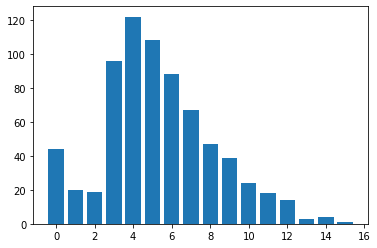

In [47]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)

plt.bar(hist_dict.keys(), hist_dict.values())

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

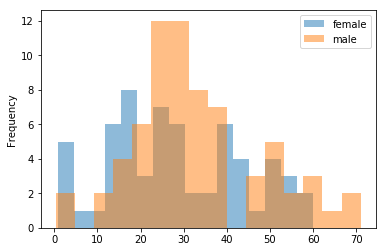

In [67]:
age = df.groupby('Sex')['Age']
age.value_counts()

Sex     Age 
female  24.0    16
        18.0    13
        22.0    12
        30.0    11
        35.0     8
                ..
male    57.0     1
        66.0     1
        70.5     1
        74.0     1
        80.0     1
Name: Age, Length: 145, dtype: int64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

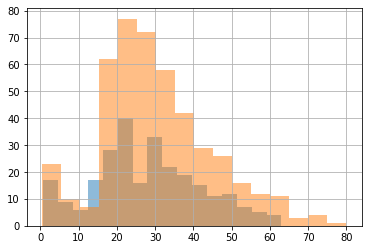

In [81]:
age.hist(bins=16, alpha=0.5)